In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import math
from sklearn import linear_model
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError


In [2]:
df1 = pd.read_excel('Dataset_Hackathon.xlsx')
df1.head()

,Country,Commodity,Flow,Quantity,Category,Volume (m^3),Distance from India (m),Frieght Cost (USD)
0,Albania,"Poultry cuts & offal, except livers, fresh or ...",Export,34,02_meat_and_edible_meat_offal,12,5940.830501,4840.697837
1,Albania,"Poultry cuts & offal, except livers, fresh or ...",Export,23,02_meat_and_edible_meat_offal,12,5940.830501,3069.710823
2,Albania,"Swine meat, salted/dried/smoked not ham/should...",Export,11,02_meat_and_edible_meat_offal,12,5940.830501,1475.822511
3,Albania,"Fowls, domestic, whole, frozen",Export,50,02_meat_and_edible_meat_offal,12,5940.830501,7083.948054
4,Albania,"Meat and edible offal nes fresh, chilled or fr...",Export,71,02_meat_and_edible_meat_offal,12,5940.830501,9976.560176


In [5]:
# Features
X1 = df1.drop(['Country', 'Commodity','Flow','Category'], axis = 1)
X1.head()

,Quantity,Volume (m^3),Distance from India (m),Frieght Cost (USD)
0,34,12,5940.830501,4840.697837
1,23,12,5940.830501,3069.710823
2,11,12,5940.830501,1475.822511
3,50,12,5940.830501,7083.948054
4,71,12,5940.830501,9976.560176


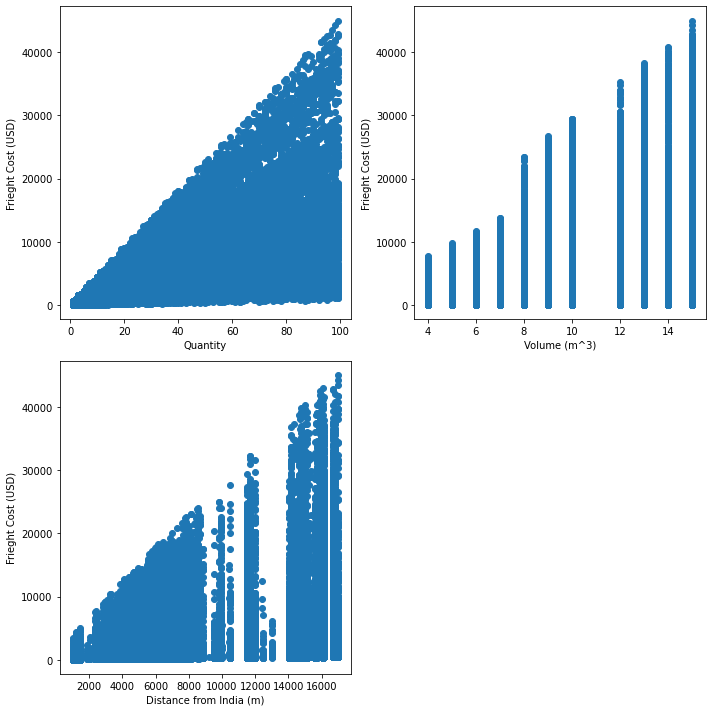

In [6]:
columns = X1.drop("Frieght Cost (USD)", axis="columns").columns
halfcol = math.ceil(len(columns)/2)
fig = plt.figure(figsize=(10,10))

for i in range(len(columns)):
    plt.subplot(halfcol, halfcol, i+1)
    column = columns[i]
    plt.xlabel(column)
    plt.ylabel("Frieght Cost (USD)")
    plt.scatter(X1[column], X1["Frieght Cost (USD)"])

fig.tight_layout()

In [7]:
X = X1.drop("Frieght Cost (USD)", axis="columns")
Y = X1["Frieght Cost (USD)"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [8]:
def scale_datasets(x_train, x_test):

  """
  Standard Scale test and train data
  Z - Score normalization
  """
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(X_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(X_test),
      columns = X_test.columns
  )
  return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(X_train, X_test)


In [9]:
print (X_train)

       Quantity  Volume (m^3)  Distance from India (m)
2257         72            12             16709.871472
47193         6             9              6015.053668
13971        18            10              4717.455140
54295         1             6             14131.857834
75158         4             4             14141.459106
...         ...           ...                      ...
70965         2             7             15009.493930
61260        53             6              5119.252007
4054          5            12             11716.501204
33897        24            13              2950.787743
49440         2             6             15943.888517

[65156 rows x 3 columns]


In [10]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [11]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    Y_train.values, 
    epochs=10, 
    batch_size=32,
    validation_split=0.1
)

Epoch 1/10
1833/1833 [==============================] - 14s 6ms/step - loss: 0.2351 - mean_squared_logarithmic_error: 0.2351 - val_loss: 0.0299 - val_mean_squared_logarithmic_error: 0.0299
Epoch 2/10
1833/1833 [==============================] - 10s 5ms/step - loss: 0.0416 - mean_squared_logarithmic_error: 0.0416 - val_loss: 0.0281 - val_mean_squared_logarithmic_error: 0.0281
Epoch 3/10
1833/1833 [==============================] - 10s 5ms/step - loss: 0.0380 - mean_squared_logarithmic_error: 0.0380 - val_loss: 0.0224 - val_mean_squared_logarithmic_error: 0.0224
Epoch 4/10
1833/1833 [==============================] - 10s 5ms/step - loss: 0.0363 - mean_squared_logarithmic_error: 0.0363 - val_loss: 0.0229 - val_mean_squared_logarithmic_error: 0.0229
Epoch 5/10
1833/1833 [==============================] - 10s 5ms/step - loss: 0.0345 - mean_squared_logarithmic_error: 0.0345 - val_loss: 0.0402 - val_mean_squared_logarithmic_error: 0.0402
Epoch 6/10
1833/1833 [==============================] -

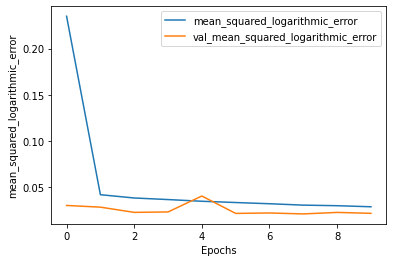

In [12]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [13]:
y_pred = model.predict(x_test_scaled)

510/510 [==============================] - 2s 4ms/step


In [14]:
y_true = Y_test

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_true, y_pred))  
print('mean_squared_log_error:', metrics.mean_squared_log_error(y_true, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_true, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
print('R2:', np.sqrt(metrics.r2_score(y_true, y_pred)))


Mean Absolute Error: 221.4067748957973
mean_squared_log_error: 0.021858320370981864
Mean Squared Error: 159942.36996167278
Root Mean Squared Error: 399.9279559641621
R2: 0.9968528059828474


In [79]:
model.save("model.h5")
 

In [80]:
input_data = np.array([34,12,5940.83050148322]).reshape(-1, 1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(input_data)
scaled_data = scaled_data.reshape(1, -1)

In [81]:
model.predict(scaled_data)

1/1 [==============================] - 0s 53ms/step


array([[871.5734]], dtype=float32)

In [ ]:
features = [[1,12,7758.83]]

model.predict([[1,12,7758.8]])